# E-Commerce Customer Churn Prediction & Analysis
### Create By : Dicky Ardi

Source Kaggle : https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

# I. Problem Framing

#### Context
- The business objective to be achieved is to get a prediction system that can be used to find out which customers will churn and the factors that occur.
Target : 
 - 0 : Loyal Customers
 - 1 : Disloyal Customers

#### Goals
- The output to be generated is a prediction of the churn status of a customer. If you can predict which customer will churn, you can help the marketing team to develop marketing strategies in an effort to avoid losses in the form of losing customers.

#### Analytic Approach
- The machine learning approach that is applied this time is supervised learning in the form of classification problems. The system will predict a predetermined label (churn).

#### Evaluation Metrics
- The performance measure that will be used to help determine the quality of the final result is accuracy to determine the percentage of prediction success. Recall and precision will also be used to find out where the prediction error is.

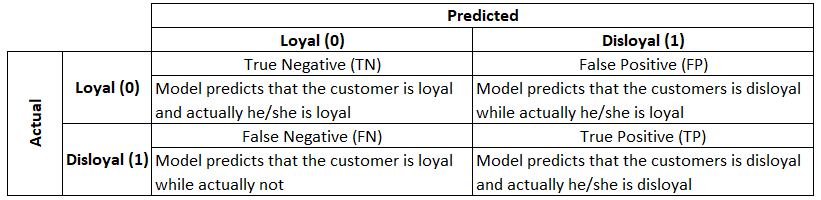

Type 1 error : False Positive (FP)
 - Risk : Wasted marketing costs, time, and resources

Type 2 error : False Negative (FN)
 - Risk : Lost customers
 
If the model incorrectly to predicts, the risk that stakeholders can experience is in the form of incorrectly giving promos to loyal customers, so that the promos given will be in vain and will increase marketing costs. In addition, the actual customer is disloyal, but the model predicts that the customer is considered loyal, then the customer will not get the promo. Therefore, the customer may completely quit and this will result in the loss of the customer.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_ecommerce = pd.read_excel('e-commerce2.xlsx')

## II. Exploratory Data Analysis

In [3]:
df_ecommerce

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
df_ecommerce

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
df_ecommerce.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns in this dataset, which consists of 5 categorical columns and 15 numerical columns

In [7]:
# Checking duplicate value from the datasets
df_duplicate = df_ecommerce.duplicated()
df_duplicate[df_duplicate == True].value_counts()

Series([], dtype: int64)

There is no duplicate data on datasets

In [8]:
df_ecommerce.drop('CustomerID',axis='columns',inplace=True)

Drop the CustomerID column because it will definitely not be used as a feature

#### Feature Engineering - Adding new variable

In [9]:
# Generating new features from cashback amount divided order count
df_ecommerce['avg_cashbk_per_order'] = df_ecommerce['CashbackAmount'] / df_ecommerce['OrderCount']

In [10]:
# Checking missing values 
df_ecommerce.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
avg_cashbk_per_order           258
dtype: int64

In [11]:
# Calculate the percentage of each missing value
for i in range(len(df_ecommerce.columns)):
    missing_data = df_ecommerce[df_ecommerce.columns[i]].isna().sum()
    perc = missing_data / len(df_ecommerce) * 100
    print('>%d,  Missing value: %d, percentage %.2f%%' % (i, missing_data, perc))

>0,  Missing value: 0, percentage 0.00%
>1,  Missing value: 264, percentage 4.69%
>2,  Missing value: 0, percentage 0.00%
>3,  Missing value: 0, percentage 0.00%
>4,  Missing value: 251, percentage 4.46%
>5,  Missing value: 0, percentage 0.00%
>6,  Missing value: 0, percentage 0.00%
>7,  Missing value: 255, percentage 4.53%
>8,  Missing value: 0, percentage 0.00%
>9,  Missing value: 0, percentage 0.00%
>10,  Missing value: 0, percentage 0.00%
>11,  Missing value: 0, percentage 0.00%
>12,  Missing value: 0, percentage 0.00%
>13,  Missing value: 0, percentage 0.00%
>14,  Missing value: 265, percentage 4.71%
>15,  Missing value: 256, percentage 4.55%
>16,  Missing value: 258, percentage 4.58%
>17,  Missing value: 307, percentage 5.45%
>18,  Missing value: 0, percentage 0.00%
>19,  Missing value: 258, percentage 4.58%


There are 7 columns whose data has missing values, and the percentage of these missing values range from 4.53% - 5.45%,

#### Numerical Features

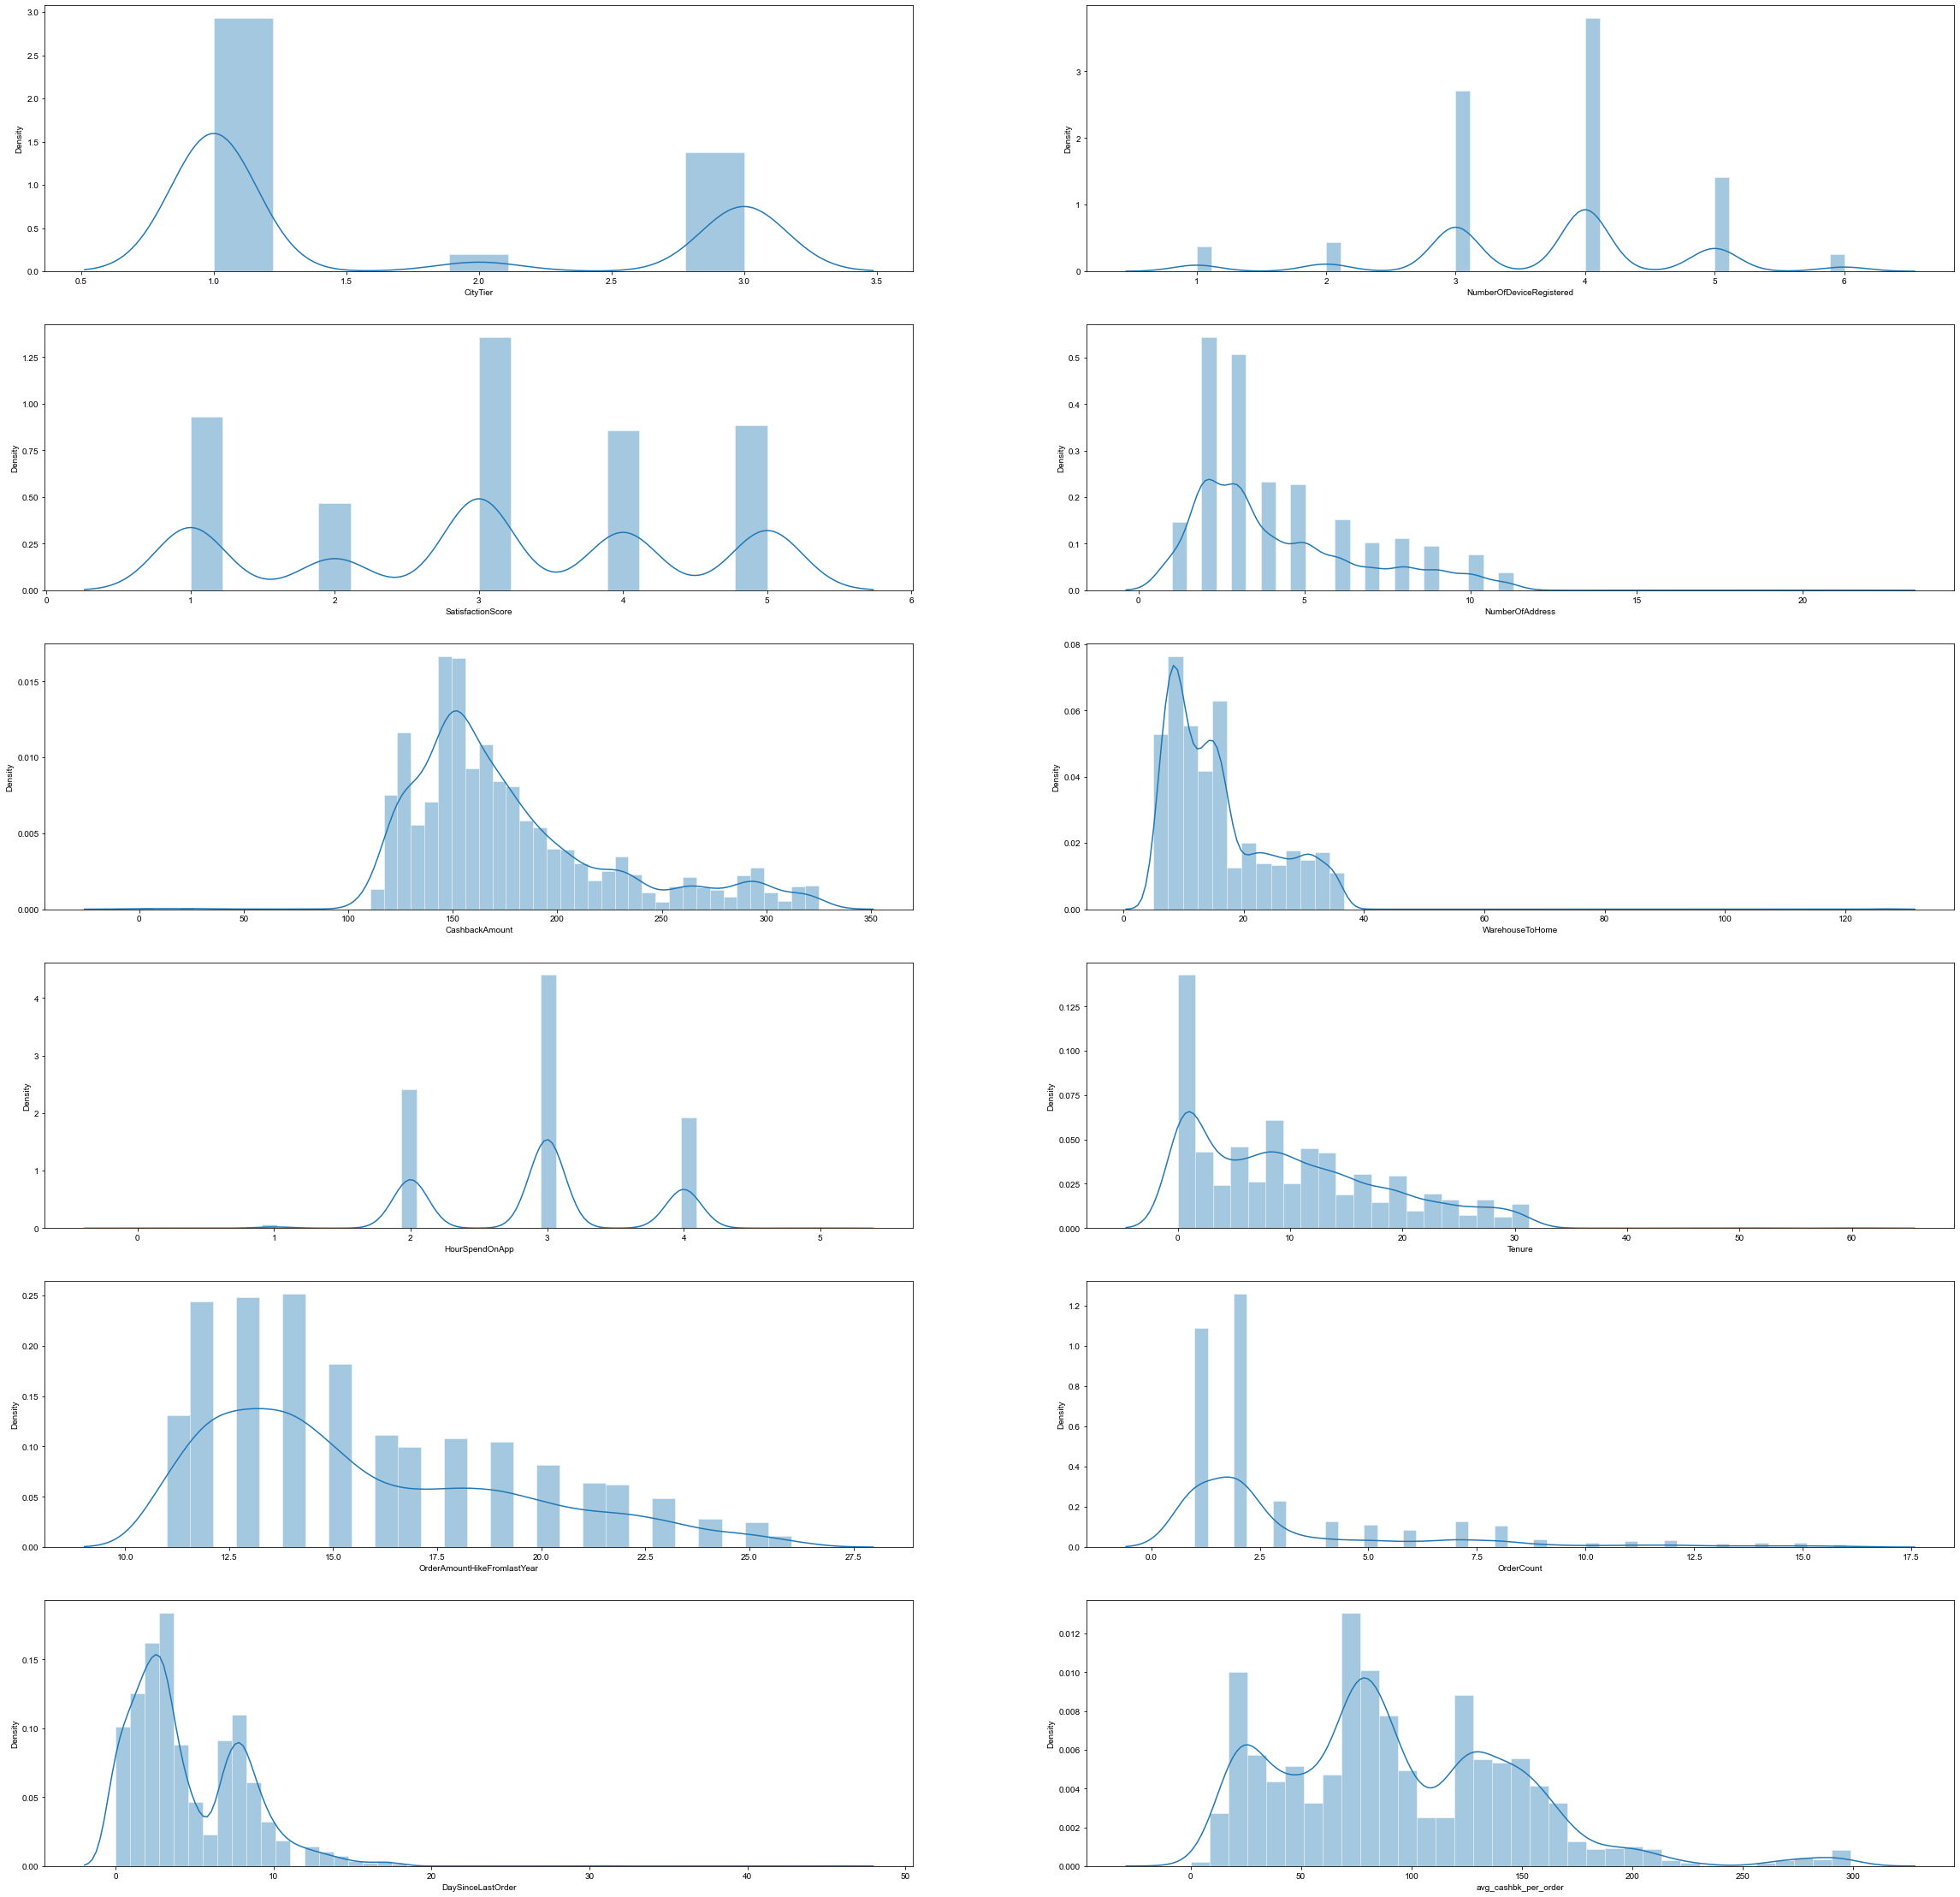

In [12]:
# The distribution of numerical variables
num = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']
fig, ax = plt.subplots(6, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.set(font_scale = 2)
    sns.distplot(df_ecommerce[i], ax=subplot)

The distribution of numerical variables tends to be skewed. To solve the missing value, we can use the median.

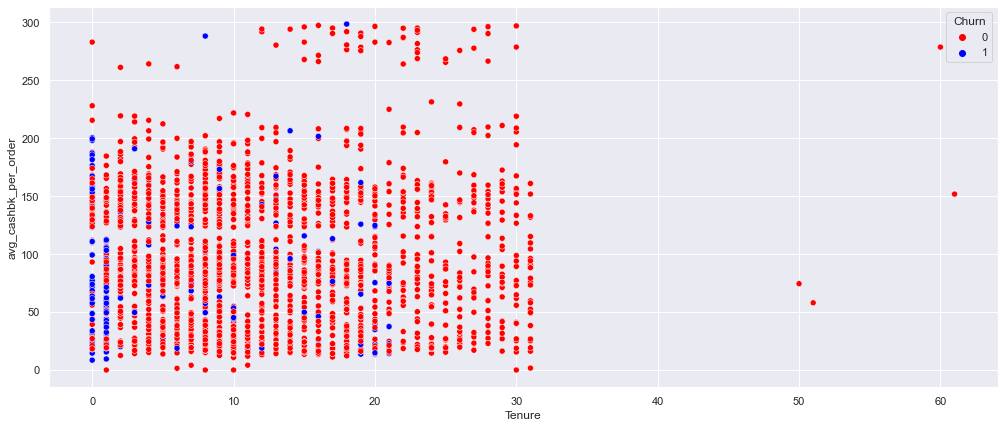

In [13]:
# Show who will churn between tenure & average cashback per order
plt.figure(figsize=(17,7))
sns.set_style("darkgrid")
sns.set(font_scale = 1)
sns.scatterplot(data=df_ecommerce,
               x='Tenure',
               y='avg_cashbk_per_order',
               hue='Churn',
               palette=['Red', 'Blue']);

- Customers who have a short tenure and the average amount of cashback per order is low will tend to churned.
- Otherwise, customers with the longer tenure tend to be more loyal

#### Binary Categorical Features

In [14]:
# Checking the categorical column that has two variable values
columns = df_ecommerce.columns
binary_cols = []
for col in columns:
    if df_ecommerce[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols

['Churn', 'Gender', 'Complain']

There is a categorical column that has two variable values (or class)

#### Exploring Categorical Features

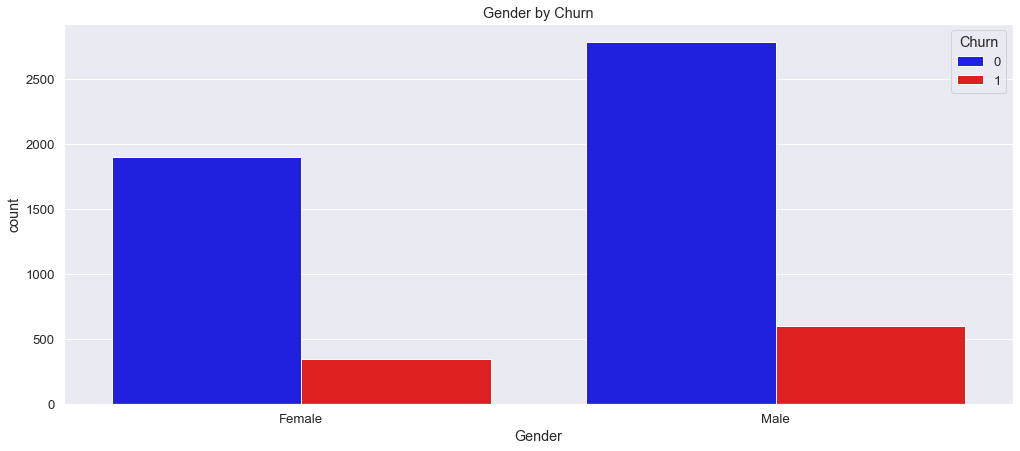

In [15]:
# Visualize gender variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='Gender',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Gender by Churn')
plt.xlabel('Gender')
plt.show()

- 60% (3384) of the customers are male, and 18% (600) of them have been churned
- 40% (2246) of the customers are female. But about 15% (348) of them are churned

Prediction Power : 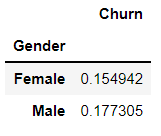

The mean churn rates for men and women are slightly different indicating that the gender variable bring a valuable prediction power to a model. Therefore, I would use the gender variable in a machine learning model.

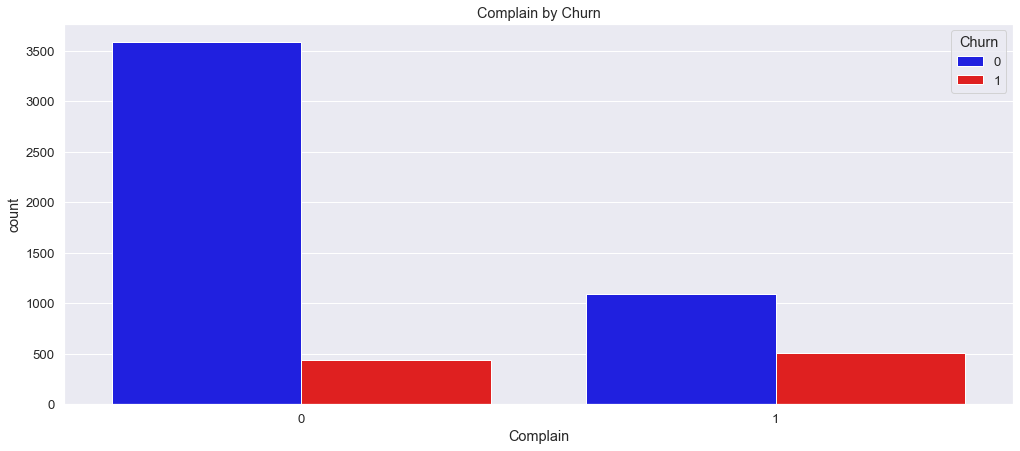

In [16]:
# Visualize complain variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='Complain',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Complain by Churn')
plt.xlabel('Complain')
plt.show()

- 28% (1604) of the customers have complained, and 32% (508) of them have been churned
- 72% (4026) of the customers do not complain. But about 11% (440) of them are churned

Prediction Power:
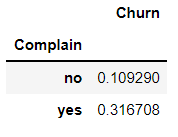

- This indicates that customers who have made complaints are more likely to do churned. 
- Otherwise, customers who never complain are more likely to be loyal.

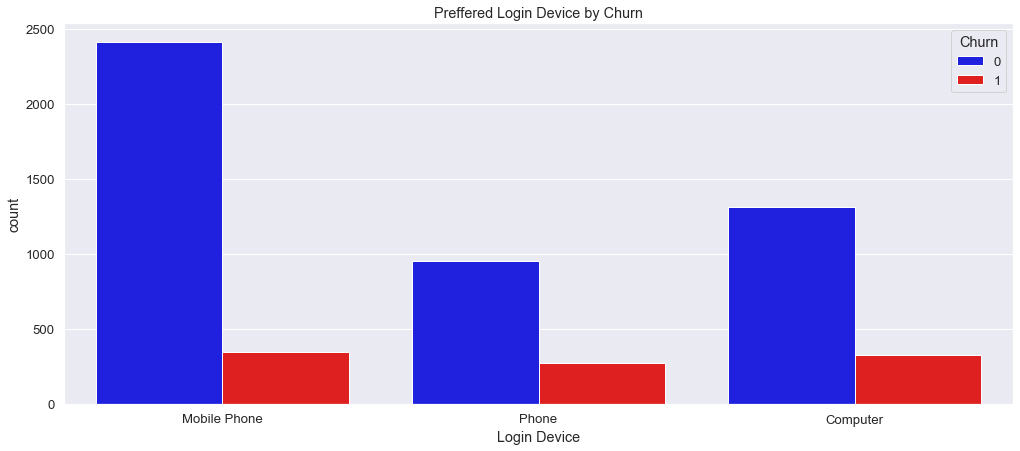

In [17]:
# Visualize preferredLoginDevice variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferredLoginDevice',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Preffered Login Device by Churn')
plt.xlabel('Login Device')
plt.show()

- 49% (2765) of the customers are use mobile phone devices, and 13% (348) of them have been churned
- 29% (1634) of the customers are use computer devices, and 20% (324) of them have been churned
- 22% (1231) of the customers are use telephone devices, and 22% (276) of them have been churned

Prediction Power: 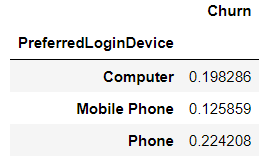

- Based on the ratio per device category, customers who use telephone devices are indicated to be disloyal.
- Customers who use Mobile Phone device indicated to be more loyal.

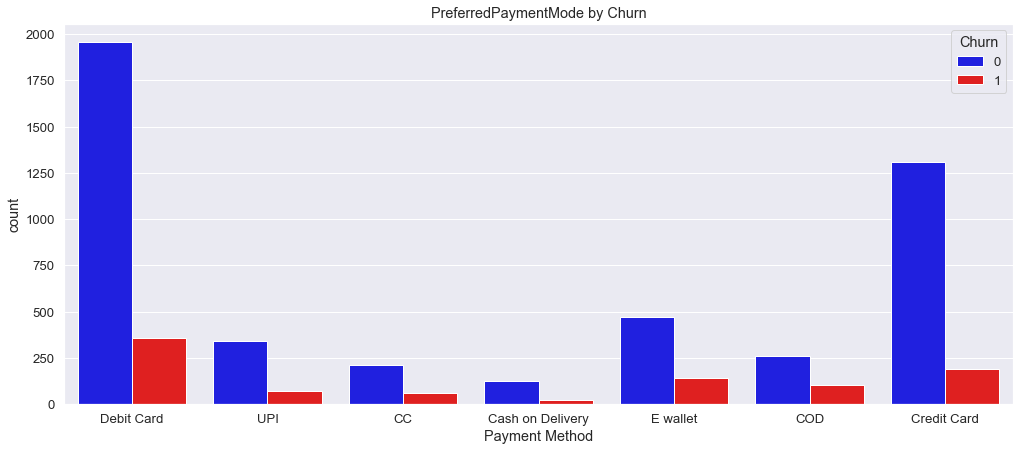

In [18]:
# Visualize PreferredPaymentMode variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferredPaymentMode',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('PreferredPaymentMode by Churn')
plt.xlabel('Payment Method')
plt.show()

- 41% (2314) of the customers are use Debit Card of payment method, and 15% (356) of them have been churned.
- 27% (1501) of the customers are use Credit Card of payment method, and 13% (193) of them have been churned.
- 11% (614) of the customers are use E-Wallet of payment method, and 23% (140) of them have been churned.
- 7% (414) of the customers are use UPI of payment method, and 17% (72) of them have been churned.
- 6% (365) of the customers are use COD of payment method, and 29% (105) of them have been churned.
- 5% (273) of the customers are use CC of payment method, and 22% (59) of them have been churned.
- 3% (148) of the customers are use Cash on Delivery of payment method, and 18% (23) of them have been churned.

Prediction Power:
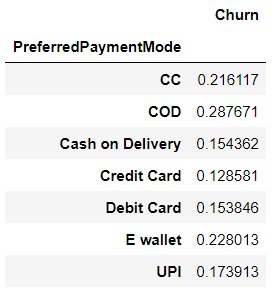

- Based on the ratio per payment method, customers who use COD of payment method are indicated to be disloyal. 
- Customers who use Credit Card of payment method indicated to be more loyal.

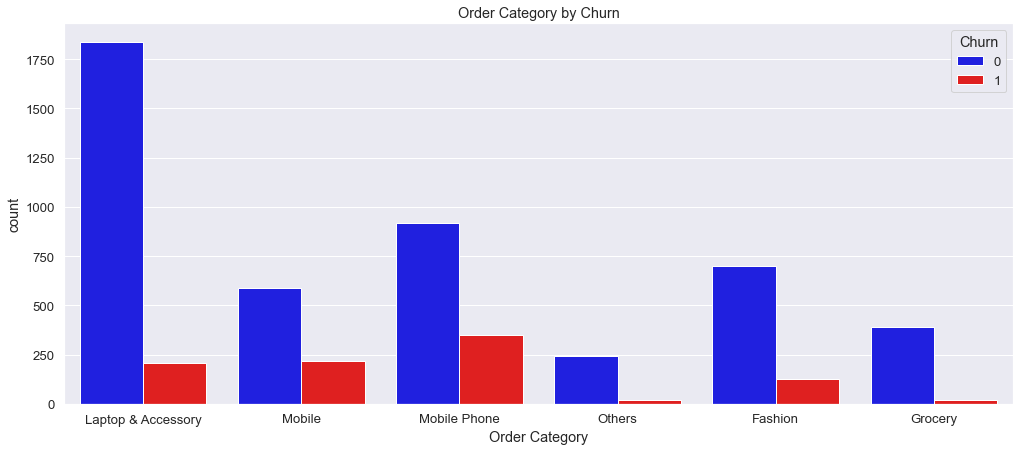

In [19]:
# Visualize order category variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferedOrderCat',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Order Category by Churn')
plt.xlabel('Order Category')
plt.show()

- 36% (2050) of the customers who ordered Laptop & Accessory, and 10% (210) of them have been churned.
- 23% (1271) of the customers who ordered Mobile Phone, and 28% (350) of them have been churned.
- 15% (826) of the customers who ordered Fashion, and 15% (128) of them have been churned.
- 14% (809) of the customers who ordered Mobile, and 27% (220) of them have been churned.
- 7% (410) of the customers who ordered Grocery, and 5% (20) of them have been churned.
- 5% (264) of the customers who ordered Others, and 8% (20) of them have been churned.

Prediction Power:
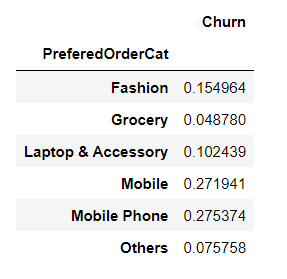

- Based on the ratio per order category, customers who ordered Mobile Phone & Mobile are indicated to be disloyal. 
- Customers who ordered Grocery indicated to be more loyal.

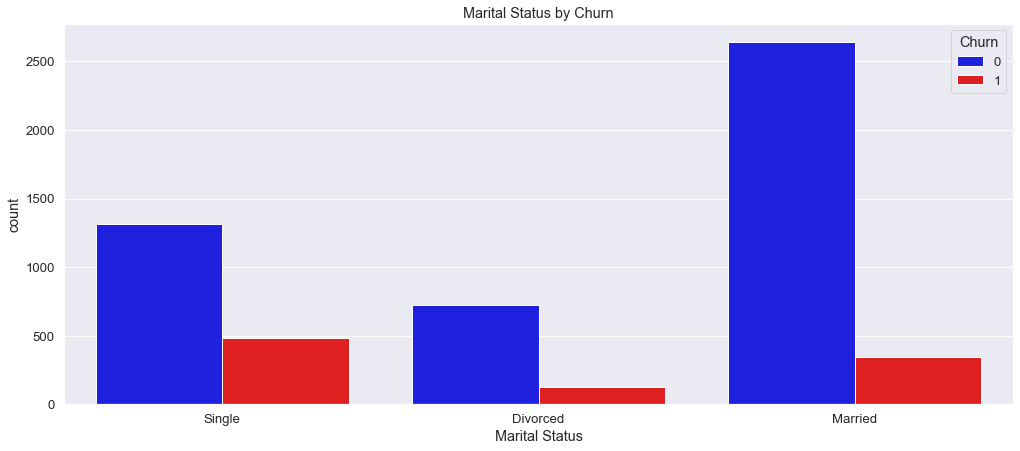

In [20]:
# Visualize martial status variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='MaritalStatus',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Marital Status by Churn')
plt.xlabel('Marital Status')
plt.show()

- 53% (2986) of the customers who Married,  and 12% (344) of them have been churned.
- 32% (1796) of the customers who Single,  and 27% (480) of them have been churned.
- 15% (848) of the customers who Divorced,  and 15% (124) of them have been churned.

Prediction Power: 
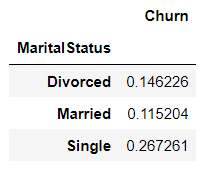

- Based on the ratio per martial status category, customers who have single status are indicated to be disloyal. 
- Customers who have married status indicated to be more loyal.

#### Analysing Churn by Each Variable

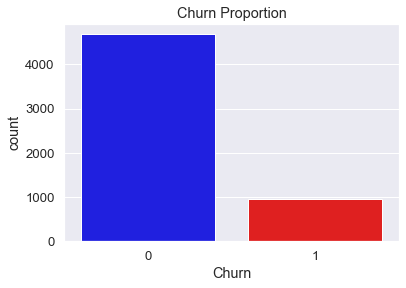

In [21]:
# Checking for proportions of churn variable
sns.countplot(x='Churn',
              data=df_ecommerce,
              palette=['Blue', 'Red'])
plt.title('Churn Proportion');

In [22]:
df_ecommerce['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

There is an imbalanced class distribution on the target variable. Positive class (Churn=1) is much less than negative class (Churn=0). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [23]:
# Percentage of customer churn
Churn_perc = round((df_ecommerce['Churn'][df_ecommerce['Churn']==1].count()*100/df_ecommerce['Churn'][df_ecommerce['Churn']==0].count()),2)
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


Source : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

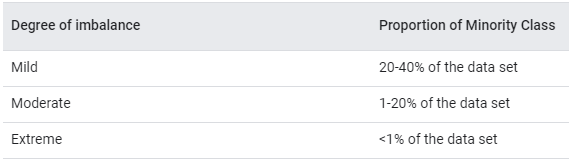

Based on the 'Proportion of Minority Class', the class imbalance that occurs is in the Mild category, which can still do downsampling to the majority class

In [24]:
# Checking for prediction power of each numerical variables
df_ecommerce[['Churn','Tenure','CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount'
             ,'WarehouseToHome', 'HourSpendOnApp','OrderAmountHikeFromlastYear',
               'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']].groupby(['Churn']).mean()

,Tenure,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,CashbackAmount,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,avg_cashbk_per_order
Churn,,,,,,,,,,,,,
0,11.502334,1.619821,3.639257,3.001282,4.162965,180.635203,15.353931,2.925530,15.724893,1.758232,3.046601,4.807406,95.576332
1,3.379469,1.827004,3.934599,3.390295,4.466245,160.370928,17.134259,2.961798,15.627409,1.717021,2.823656,3.236018,88.139500


#### Outliers

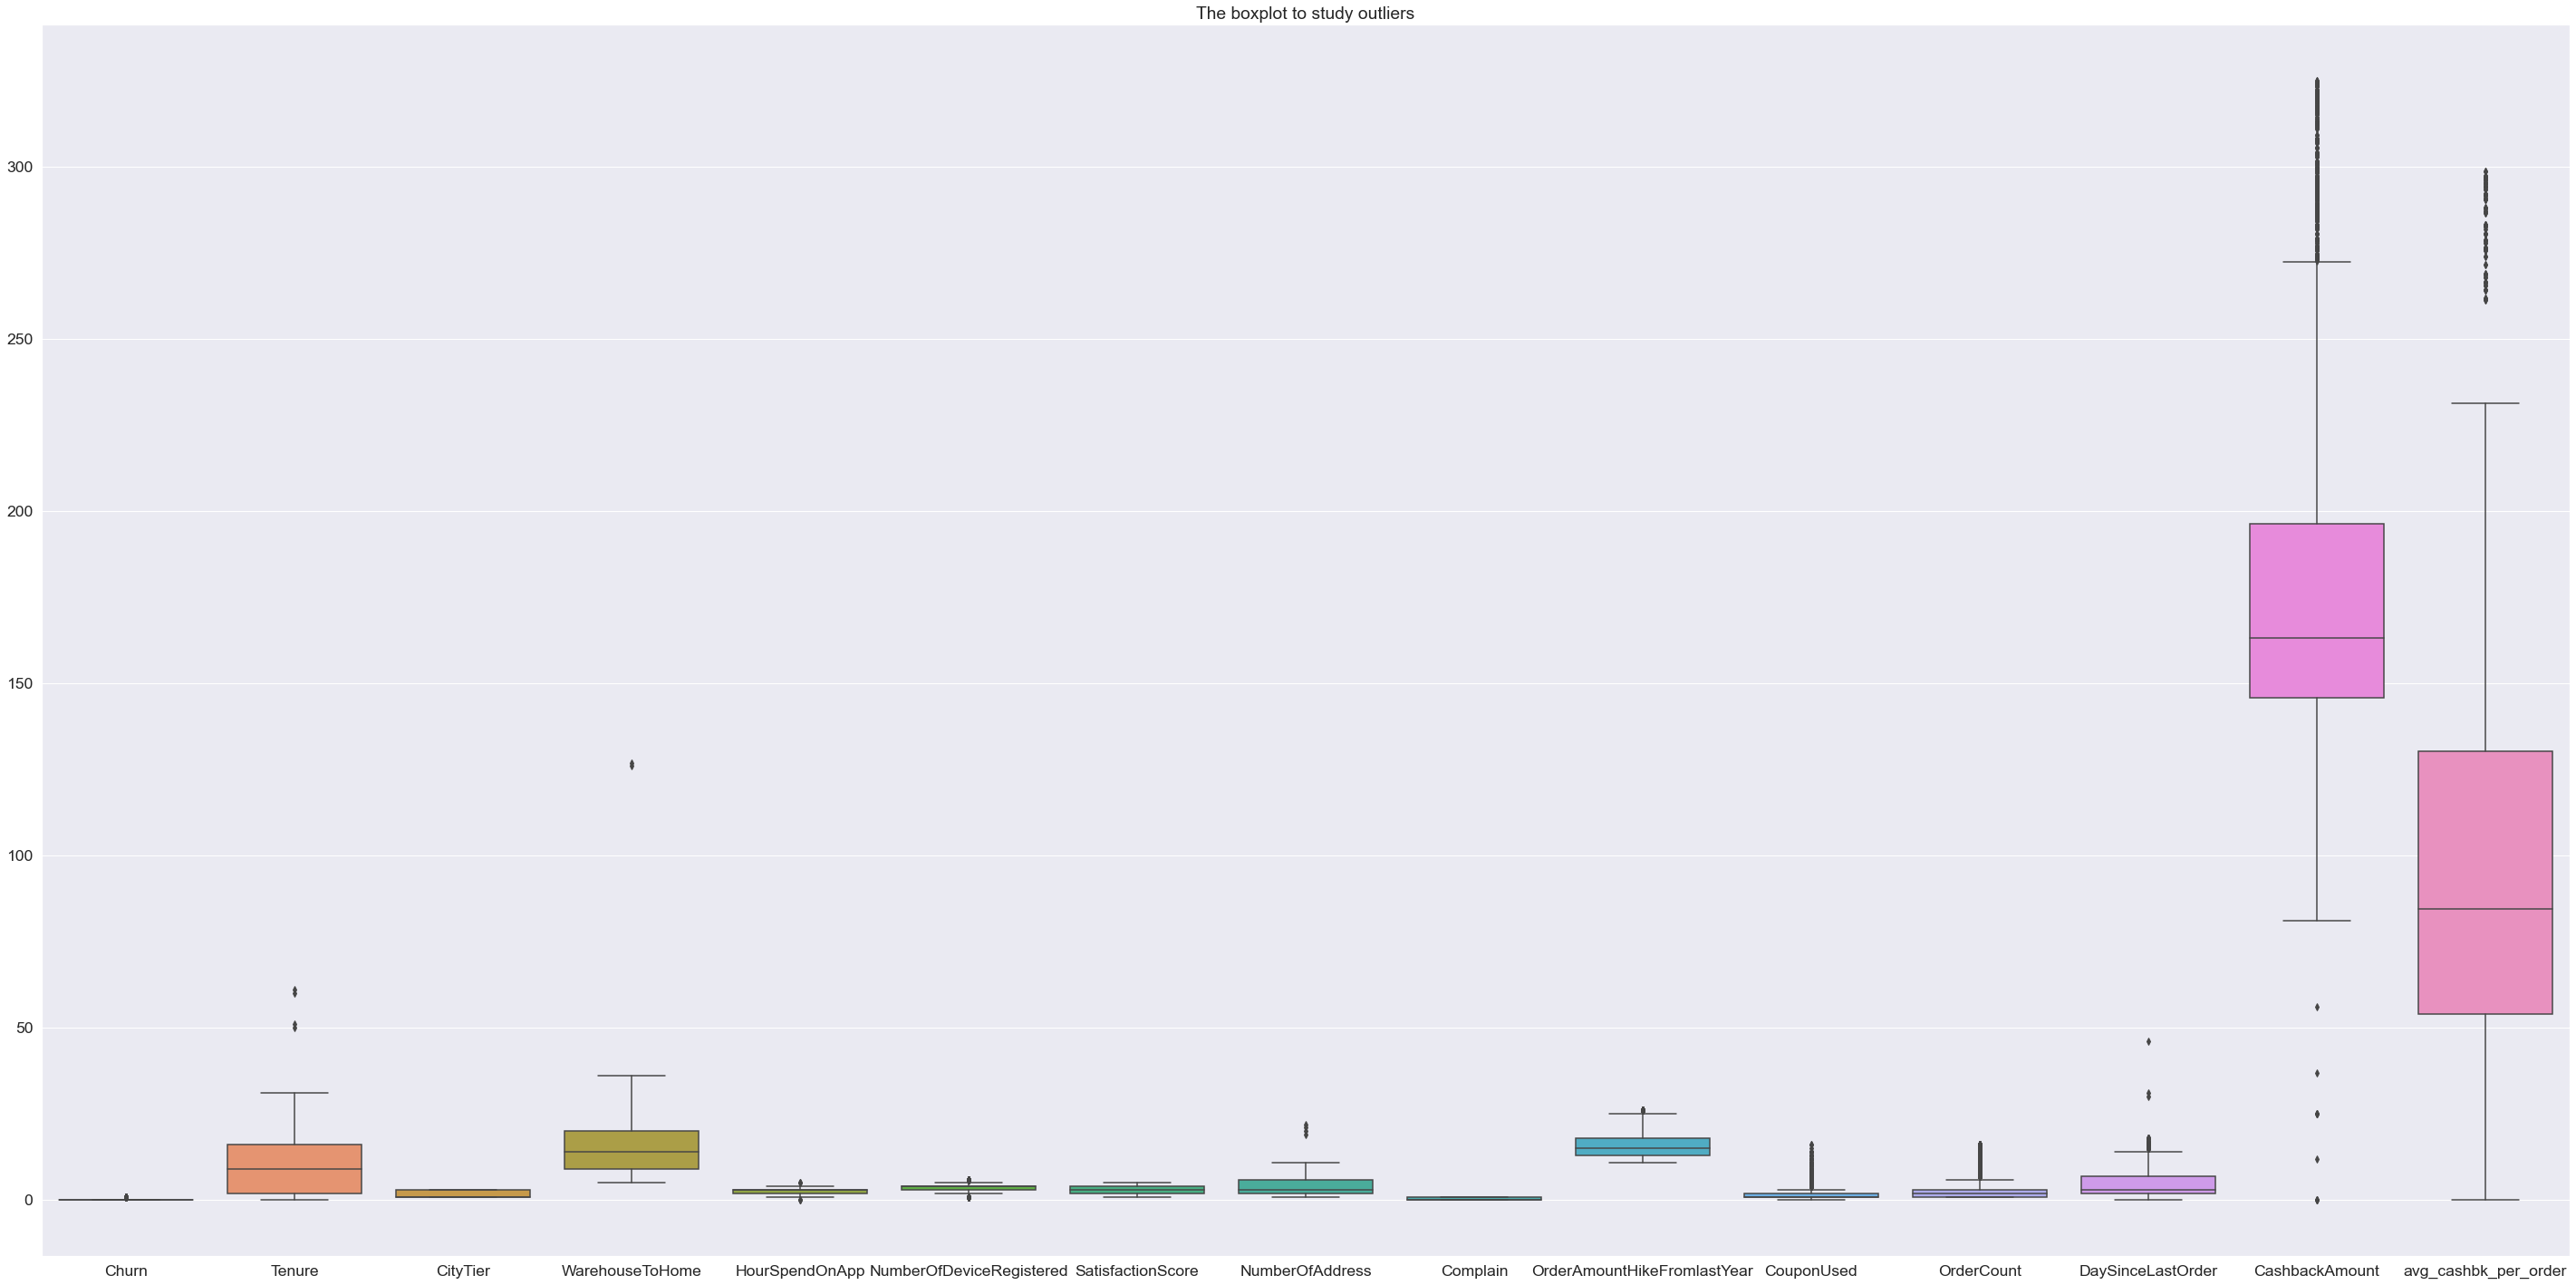

In [25]:
# Checking for outliers
sns.set(font_scale = 1.6)
plt.figure(figsize=(50,25))
sns.boxplot(data=df_ecommerce)
plt.title('The boxplot to study outliers');

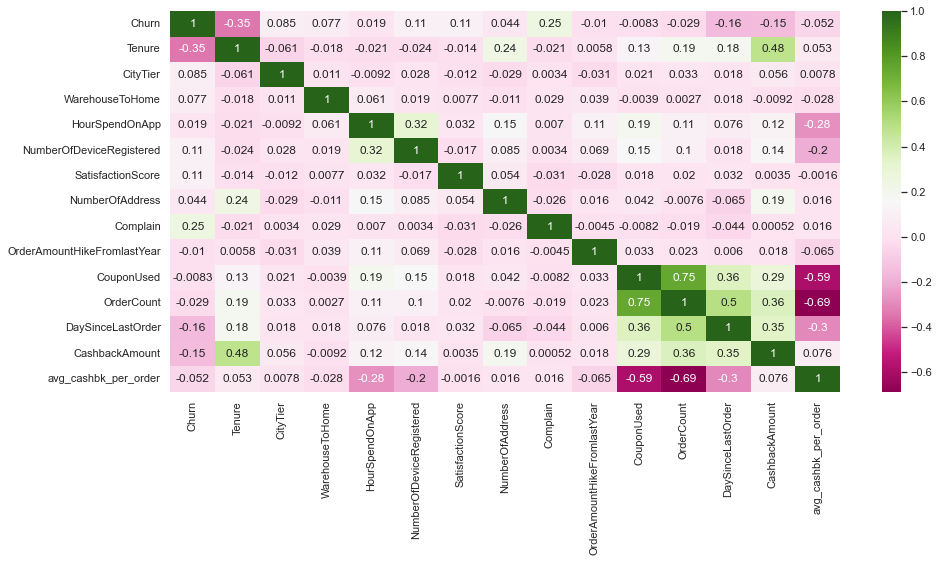

In [26]:
# Checking for correlation of each variables
plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(df_ecommerce.corr(), annot=True, cmap='PiYG');

From the correlation matrix above:

- 'OrderCount' is relatively high in correlation with 'CouponUsed', the higher the number of orders, the more coupons that will be used.

CouponUsed and OrderCount variables indicate that they have multicollinearity, so the approach we take is to take out CouponUsed as a feature

## III. Data Preprocessing

#### Handle missing value 
We handle missing value with median, because the graph showed skewed distribution 

In [27]:
# For handling the missing values
for i in df_ecommerce.columns:
    if df_ecommerce[i].isnull().sum() > 0:
        df_ecommerce[i].fillna(df_ecommerce[i].median(),inplace=True)

In [28]:
# Checking missing values after fill the missing values with median
df_ecommerce.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
avg_cashbk_per_order           0
dtype: int64

#### Splitting

In [29]:
# We splitting the datasets into training set and test set
from sklearn.model_selection import train_test_split

X = df_ecommerce.drop(['Churn'], axis=1)
y = df_ecommerce['Churn']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify = y)

#### Downsampling

We use downsampling with RandomUnderSampler to handle imbalance data.

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [31]:
y_train_under.value_counts()

0    758
1    758
Name: Churn, dtype: int64

We need to encode all categorical features, and rescale the numerical features.

In [32]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

ctg_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
           'PreferedOrderCat', 'MaritalStatus']

num_cols = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order', 'Complain']


full_pipeline = ColumnTransformer([
    ('ctg_transformer', OneHotEncoder(), ctg_cols),
    ('num_transformer', RobustScaler(), num_cols)
])

full_pipeline_log = Pipeline([
    ('full_pipeline',full_pipeline),
    ('log_reg',LogisticRegression())
])

full_pipeline_knn = Pipeline([
    ('full_pipeline',full_pipeline),
    ('knn',KNeighborsClassifier())
])

full_pipeline_dt = Pipeline([
    ('full_pipeline',full_pipeline),
    ('dt',DecisionTreeClassifier())
])

full_pipeline_ada = Pipeline([
    ('full_pipeline',full_pipeline),
    ('ada',AdaBoostClassifier())
])

full_pipeline_cb = Pipeline([
    ('full_pipeline',full_pipeline),
    ('cb',CatBoostClassifier())
])

In [33]:
#  
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(full_pipeline.fit_transform(X_train_under, y_train_under))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5,0.50,0.544919,-0.416667,1.0,0.772727,0.0,2.0,1.333333,-0.859987,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.25,0.073069,0.250000,0.0,0.045455,-0.2,0.0,0.166667,-0.078476,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.75,0.609683,-0.583333,0.0,1.136364,-0.6,0.0,0.000000,0.123511,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.640593,0.000000,-1.0,-0.500000,-0.4,0.0,-0.166667,-0.347105,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.50,0.187037,0.166667,0.0,0.772727,-0.6,0.0,0.833333,-0.035577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.00,-0.383641,0.083333,0.0,-0.409091,-0.4,0.0,-0.333333,-0.250386,0.0
1512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.5,-0.25,1.317037,1.750000,-1.0,0.409091,-0.6,3.5,0.000000,-0.955255,1.0
1513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.50,-0.050360,0.083333,-1.0,0.045455,-0.4,-0.5,0.000000,1.089675,0.0
1514,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.50,2.213005,0.666667,0.0,-0.409091,-0.4,3.0,0.833333,-0.822906,1.0


## IV. Model Training

We'll select one of these algorithms :

1. Logistic Regression (Could be the simplest model we could have)
2. Decision Tree (Easy to understand and interpret)
3. K-Nearest Neighbor (This model is good for handling outliers)
4. AdaBoost (In each iteration, trying to provide excellent fit)
5. CatBoost (Easy to use, efficient, and works very well with categorical variables.)

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

models = [full_pipeline_log, full_pipeline_dt, full_pipeline_knn, full_pipeline_ada, full_pipeline_cb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_,X_train_under,y_train_under, cv=5, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1', 'roc_auc'), 
                               return_train_score=True)
    df_results = df_results.append({
        'Model': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
        'roc_auc (train)': cv_scores['train_roc_auc'].mean(),
        'roc_auc (val)': cv_scores['test_roc_auc'].mean()
    }, ignore_index=True)
    
df_results

Learning rate set to 0.011184
0:	learn: 0.6875252	total: 161ms	remaining: 2m 41s
1:	learn: 0.6812621	total: 164ms	remaining: 1m 21s
2:	learn: 0.6755454	total: 166ms	remaining: 55.3s
3:	learn: 0.6706478	total: 169ms	remaining: 42s
4:	learn: 0.6658088	total: 170ms	remaining: 33.9s
5:	learn: 0.6613844	total: 172ms	remaining: 28.5s
6:	learn: 0.6556430	total: 175ms	remaining: 24.8s
7:	learn: 0.6506966	total: 177ms	remaining: 21.9s
8:	learn: 0.6464115	total: 179ms	remaining: 19.7s
9:	learn: 0.6424558	total: 181ms	remaining: 17.9s
10:	learn: 0.6373230	total: 183ms	remaining: 16.5s
11:	learn: 0.6330468	total: 185ms	remaining: 15.2s
12:	learn: 0.6297592	total: 187ms	remaining: 14.2s
13:	learn: 0.6246395	total: 189ms	remaining: 13.3s
14:	learn: 0.6209207	total: 191ms	remaining: 12.6s
15:	learn: 0.6168256	total: 194ms	remaining: 11.9s
16:	learn: 0.6131095	total: 196ms	remaining: 11.3s
17:	learn: 0.6087562	total: 198ms	remaining: 10.8s
18:	learn: 0.6054018	total: 200ms	remaining: 10.3s
19:	learn: 

238:	learn: 0.3215999	total: 683ms	remaining: 2.17s
239:	learn: 0.3214115	total: 686ms	remaining: 2.17s
240:	learn: 0.3209290	total: 688ms	remaining: 2.17s
241:	learn: 0.3204368	total: 690ms	remaining: 2.16s
242:	learn: 0.3199312	total: 692ms	remaining: 2.15s
243:	learn: 0.3194471	total: 694ms	remaining: 2.15s
244:	learn: 0.3190431	total: 696ms	remaining: 2.15s
245:	learn: 0.3184774	total: 699ms	remaining: 2.14s
246:	learn: 0.3180102	total: 701ms	remaining: 2.14s
247:	learn: 0.3177435	total: 703ms	remaining: 2.13s
248:	learn: 0.3173166	total: 705ms	remaining: 2.13s
249:	learn: 0.3170175	total: 708ms	remaining: 2.12s
250:	learn: 0.3166150	total: 710ms	remaining: 2.12s
251:	learn: 0.3159555	total: 712ms	remaining: 2.11s
252:	learn: 0.3154988	total: 714ms	remaining: 2.11s
253:	learn: 0.3152350	total: 716ms	remaining: 2.1s
254:	learn: 0.3147139	total: 718ms	remaining: 2.1s
255:	learn: 0.3142098	total: 720ms	remaining: 2.09s
256:	learn: 0.3137750	total: 722ms	remaining: 2.09s
257:	learn: 0.

398:	learn: 0.2567571	total: 1.03s	remaining: 1.55s
399:	learn: 0.2559241	total: 1.03s	remaining: 1.55s
400:	learn: 0.2557100	total: 1.04s	remaining: 1.55s
401:	learn: 0.2552845	total: 1.04s	remaining: 1.54s
402:	learn: 0.2549352	total: 1.04s	remaining: 1.54s
403:	learn: 0.2546283	total: 1.04s	remaining: 1.54s
404:	learn: 0.2544226	total: 1.05s	remaining: 1.54s
405:	learn: 0.2542331	total: 1.05s	remaining: 1.53s
406:	learn: 0.2537064	total: 1.05s	remaining: 1.53s
407:	learn: 0.2532785	total: 1.05s	remaining: 1.53s
408:	learn: 0.2530831	total: 1.06s	remaining: 1.53s
409:	learn: 0.2527249	total: 1.06s	remaining: 1.52s
410:	learn: 0.2522491	total: 1.06s	remaining: 1.52s
411:	learn: 0.2519002	total: 1.06s	remaining: 1.52s
412:	learn: 0.2516842	total: 1.07s	remaining: 1.51s
413:	learn: 0.2514700	total: 1.07s	remaining: 1.51s
414:	learn: 0.2510359	total: 1.07s	remaining: 1.51s
415:	learn: 0.2505670	total: 1.07s	remaining: 1.51s
416:	learn: 0.2500357	total: 1.08s	remaining: 1.5s
417:	learn: 0

634:	learn: 0.1905005	total: 1.55s	remaining: 893ms
635:	learn: 0.1903561	total: 1.56s	remaining: 891ms
636:	learn: 0.1900959	total: 1.56s	remaining: 888ms
637:	learn: 0.1898255	total: 1.56s	remaining: 885ms
638:	learn: 0.1896239	total: 1.56s	remaining: 883ms
639:	learn: 0.1895183	total: 1.56s	remaining: 880ms
640:	learn: 0.1891749	total: 1.57s	remaining: 878ms
641:	learn: 0.1889447	total: 1.57s	remaining: 875ms
642:	learn: 0.1887265	total: 1.57s	remaining: 873ms
643:	learn: 0.1885003	total: 1.57s	remaining: 870ms
644:	learn: 0.1883184	total: 1.58s	remaining: 867ms
645:	learn: 0.1880732	total: 1.58s	remaining: 865ms
646:	learn: 0.1877761	total: 1.58s	remaining: 862ms
647:	learn: 0.1875676	total: 1.58s	remaining: 859ms
648:	learn: 0.1872634	total: 1.58s	remaining: 857ms
649:	learn: 0.1870552	total: 1.59s	remaining: 854ms
650:	learn: 0.1869766	total: 1.59s	remaining: 851ms
651:	learn: 0.1868070	total: 1.59s	remaining: 849ms
652:	learn: 0.1867027	total: 1.59s	remaining: 846ms
653:	learn: 

808:	learn: 0.1586661	total: 1.9s	remaining: 450ms
809:	learn: 0.1584414	total: 1.91s	remaining: 447ms
810:	learn: 0.1582123	total: 1.91s	remaining: 445ms
811:	learn: 0.1578610	total: 1.91s	remaining: 442ms
812:	learn: 0.1578129	total: 1.91s	remaining: 440ms
813:	learn: 0.1576927	total: 1.91s	remaining: 438ms
814:	learn: 0.1575643	total: 1.92s	remaining: 435ms
815:	learn: 0.1574212	total: 1.92s	remaining: 433ms
816:	learn: 0.1571743	total: 1.92s	remaining: 430ms
817:	learn: 0.1570418	total: 1.92s	remaining: 428ms
818:	learn: 0.1569789	total: 1.93s	remaining: 426ms
819:	learn: 0.1567658	total: 1.93s	remaining: 423ms
820:	learn: 0.1565203	total: 1.93s	remaining: 421ms
821:	learn: 0.1563941	total: 1.93s	remaining: 418ms
822:	learn: 0.1563283	total: 1.93s	remaining: 416ms
823:	learn: 0.1560573	total: 1.94s	remaining: 413ms
824:	learn: 0.1557639	total: 1.94s	remaining: 411ms
825:	learn: 0.1556842	total: 1.94s	remaining: 409ms
826:	learn: 0.1556248	total: 1.94s	remaining: 406ms
827:	learn: 0

981:	learn: 0.1299687	total: 2.25s	remaining: 41.3ms
982:	learn: 0.1297661	total: 2.26s	remaining: 39ms
983:	learn: 0.1296943	total: 2.26s	remaining: 36.7ms
984:	learn: 0.1295730	total: 2.26s	remaining: 34.4ms
985:	learn: 0.1294493	total: 2.26s	remaining: 32.1ms
986:	learn: 0.1291750	total: 2.27s	remaining: 29.8ms
987:	learn: 0.1291366	total: 2.27s	remaining: 27.5ms
988:	learn: 0.1288661	total: 2.27s	remaining: 25.2ms
989:	learn: 0.1287981	total: 2.27s	remaining: 22.9ms
990:	learn: 0.1287160	total: 2.27s	remaining: 20.6ms
991:	learn: 0.1286076	total: 2.27s	remaining: 18.4ms
992:	learn: 0.1284285	total: 2.28s	remaining: 16.1ms
993:	learn: 0.1283301	total: 2.28s	remaining: 13.8ms
994:	learn: 0.1282408	total: 2.28s	remaining: 11.5ms
995:	learn: 0.1280704	total: 2.28s	remaining: 9.17ms
996:	learn: 0.1280268	total: 2.29s	remaining: 6.88ms
997:	learn: 0.1279222	total: 2.29s	remaining: 4.58ms
998:	learn: 0.1278382	total: 2.29s	remaining: 2.29ms
999:	learn: 0.1277109	total: 2.29s	remaining: 0u

175:	learn: 0.3618085	total: 364ms	remaining: 1.71s
176:	learn: 0.3612827	total: 367ms	remaining: 1.7s
177:	learn: 0.3605002	total: 369ms	remaining: 1.7s
178:	learn: 0.3599058	total: 371ms	remaining: 1.7s
179:	learn: 0.3594743	total: 374ms	remaining: 1.7s
180:	learn: 0.3587983	total: 376ms	remaining: 1.7s
181:	learn: 0.3584248	total: 378ms	remaining: 1.7s
182:	learn: 0.3577110	total: 381ms	remaining: 1.7s
183:	learn: 0.3571381	total: 383ms	remaining: 1.7s
184:	learn: 0.3565938	total: 386ms	remaining: 1.7s
185:	learn: 0.3558688	total: 388ms	remaining: 1.7s
186:	learn: 0.3549064	total: 390ms	remaining: 1.7s
187:	learn: 0.3544583	total: 392ms	remaining: 1.69s
188:	learn: 0.3538103	total: 395ms	remaining: 1.69s
189:	learn: 0.3532216	total: 397ms	remaining: 1.69s
190:	learn: 0.3526833	total: 399ms	remaining: 1.69s
191:	learn: 0.3519884	total: 401ms	remaining: 1.69s
192:	learn: 0.3511837	total: 403ms	remaining: 1.69s
193:	learn: 0.3505509	total: 405ms	remaining: 1.68s
194:	learn: 0.3499555	t

337:	learn: 0.2809425	total: 710ms	remaining: 1.39s
338:	learn: 0.2805015	total: 713ms	remaining: 1.39s
339:	learn: 0.2802147	total: 715ms	remaining: 1.39s
340:	learn: 0.2797545	total: 717ms	remaining: 1.39s
341:	learn: 0.2795260	total: 719ms	remaining: 1.38s
342:	learn: 0.2792105	total: 721ms	remaining: 1.38s
343:	learn: 0.2788198	total: 723ms	remaining: 1.38s
344:	learn: 0.2785584	total: 726ms	remaining: 1.38s
345:	learn: 0.2780812	total: 728ms	remaining: 1.38s
346:	learn: 0.2775066	total: 730ms	remaining: 1.37s
347:	learn: 0.2770247	total: 732ms	remaining: 1.37s
348:	learn: 0.2768619	total: 734ms	remaining: 1.37s
349:	learn: 0.2765842	total: 737ms	remaining: 1.37s
350:	learn: 0.2763005	total: 739ms	remaining: 1.37s
351:	learn: 0.2759730	total: 741ms	remaining: 1.36s
352:	learn: 0.2756536	total: 743ms	remaining: 1.36s
353:	learn: 0.2752890	total: 745ms	remaining: 1.36s
354:	learn: 0.2748136	total: 748ms	remaining: 1.36s
355:	learn: 0.2744848	total: 750ms	remaining: 1.36s
356:	learn: 

503:	learn: 0.2294053	total: 1.06s	remaining: 1.04s
504:	learn: 0.2289101	total: 1.06s	remaining: 1.04s
505:	learn: 0.2287555	total: 1.06s	remaining: 1.04s
506:	learn: 0.2286052	total: 1.06s	remaining: 1.03s
507:	learn: 0.2284542	total: 1.07s	remaining: 1.03s
508:	learn: 0.2282699	total: 1.07s	remaining: 1.03s
509:	learn: 0.2280188	total: 1.07s	remaining: 1.03s
510:	learn: 0.2278213	total: 1.07s	remaining: 1.03s
511:	learn: 0.2276818	total: 1.07s	remaining: 1.02s
512:	learn: 0.2273082	total: 1.08s	remaining: 1.02s
513:	learn: 0.2271041	total: 1.08s	remaining: 1.02s
514:	learn: 0.2266082	total: 1.08s	remaining: 1.02s
515:	learn: 0.2262930	total: 1.08s	remaining: 1.02s
516:	learn: 0.2261434	total: 1.08s	remaining: 1.01s
517:	learn: 0.2258151	total: 1.09s	remaining: 1.01s
518:	learn: 0.2255733	total: 1.09s	remaining: 1.01s
519:	learn: 0.2253067	total: 1.09s	remaining: 1.01s
520:	learn: 0.2248582	total: 1.09s	remaining: 1s
521:	learn: 0.2246392	total: 1.09s	remaining: 1s
522:	learn: 0.2241

668:	learn: 0.1885918	total: 1.4s	remaining: 694ms
669:	learn: 0.1882805	total: 1.41s	remaining: 693ms
670:	learn: 0.1881049	total: 1.41s	remaining: 690ms
671:	learn: 0.1877326	total: 1.41s	remaining: 688ms
672:	learn: 0.1873930	total: 1.41s	remaining: 686ms
673:	learn: 0.1872018	total: 1.41s	remaining: 684ms
674:	learn: 0.1870328	total: 1.42s	remaining: 682ms
675:	learn: 0.1868605	total: 1.42s	remaining: 680ms
676:	learn: 0.1867240	total: 1.42s	remaining: 678ms
677:	learn: 0.1865240	total: 1.42s	remaining: 676ms
678:	learn: 0.1862906	total: 1.43s	remaining: 674ms
679:	learn: 0.1861547	total: 1.43s	remaining: 672ms
680:	learn: 0.1858701	total: 1.43s	remaining: 670ms
681:	learn: 0.1857307	total: 1.43s	remaining: 668ms
682:	learn: 0.1855031	total: 1.43s	remaining: 665ms
683:	learn: 0.1852753	total: 1.44s	remaining: 663ms
684:	learn: 0.1849923	total: 1.44s	remaining: 661ms
685:	learn: 0.1848893	total: 1.44s	remaining: 659ms
686:	learn: 0.1847874	total: 1.44s	remaining: 657ms
687:	learn: 0

841:	learn: 0.1568672	total: 1.75s	remaining: 329ms
842:	learn: 0.1566060	total: 1.75s	remaining: 327ms
843:	learn: 0.1563266	total: 1.76s	remaining: 325ms
844:	learn: 0.1561075	total: 1.76s	remaining: 323ms
845:	learn: 0.1557414	total: 1.76s	remaining: 321ms
846:	learn: 0.1555491	total: 1.76s	remaining: 318ms
847:	learn: 0.1552221	total: 1.76s	remaining: 316ms
848:	learn: 0.1551084	total: 1.77s	remaining: 314ms
849:	learn: 0.1548825	total: 1.77s	remaining: 312ms
850:	learn: 0.1548332	total: 1.77s	remaining: 310ms
851:	learn: 0.1546849	total: 1.77s	remaining: 308ms
852:	learn: 0.1543977	total: 1.77s	remaining: 306ms
853:	learn: 0.1542261	total: 1.78s	remaining: 304ms
854:	learn: 0.1540649	total: 1.78s	remaining: 302ms
855:	learn: 0.1538890	total: 1.78s	remaining: 300ms
856:	learn: 0.1537837	total: 1.78s	remaining: 298ms
857:	learn: 0.1535815	total: 1.78s	remaining: 296ms
858:	learn: 0.1534900	total: 1.79s	remaining: 293ms
859:	learn: 0.1533981	total: 1.79s	remaining: 291ms
860:	learn: 

Learning rate set to 0.011188
0:	learn: 0.6874580	total: 2.19ms	remaining: 2.19s
1:	learn: 0.6819688	total: 4.32ms	remaining: 2.15s
2:	learn: 0.6752930	total: 6.31ms	remaining: 2.1s
3:	learn: 0.6698334	total: 8.37ms	remaining: 2.08s
4:	learn: 0.6640048	total: 10.3ms	remaining: 2.05s
5:	learn: 0.6586746	total: 12.3ms	remaining: 2.03s
6:	learn: 0.6535676	total: 14.2ms	remaining: 2.01s
7:	learn: 0.6488519	total: 16.1ms	remaining: 2s
8:	learn: 0.6439025	total: 17.9ms	remaining: 1.97s
9:	learn: 0.6386847	total: 19.9ms	remaining: 1.97s
10:	learn: 0.6329186	total: 21.7ms	remaining: 1.95s
11:	learn: 0.6279823	total: 23.7ms	remaining: 1.95s
12:	learn: 0.6231084	total: 25.6ms	remaining: 1.95s
13:	learn: 0.6179317	total: 27.6ms	remaining: 1.94s
14:	learn: 0.6131622	total: 29.5ms	remaining: 1.94s
15:	learn: 0.6106075	total: 30.8ms	remaining: 1.89s
16:	learn: 0.6057136	total: 32.7ms	remaining: 1.89s
17:	learn: 0.6003781	total: 34.6ms	remaining: 1.89s
18:	learn: 0.5959779	total: 36.7ms	remaining: 1.

168:	learn: 0.3487257	total: 335ms	remaining: 1.65s
169:	learn: 0.3480613	total: 337ms	remaining: 1.65s
170:	learn: 0.3474190	total: 339ms	remaining: 1.64s
171:	learn: 0.3467419	total: 342ms	remaining: 1.64s
172:	learn: 0.3457951	total: 344ms	remaining: 1.64s
173:	learn: 0.3452498	total: 346ms	remaining: 1.64s
174:	learn: 0.3446100	total: 348ms	remaining: 1.64s
175:	learn: 0.3439690	total: 350ms	remaining: 1.64s
176:	learn: 0.3432484	total: 352ms	remaining: 1.64s
177:	learn: 0.3427814	total: 354ms	remaining: 1.64s
178:	learn: 0.3421198	total: 356ms	remaining: 1.63s
179:	learn: 0.3410253	total: 358ms	remaining: 1.63s
180:	learn: 0.3403342	total: 360ms	remaining: 1.63s
181:	learn: 0.3397299	total: 362ms	remaining: 1.63s
182:	learn: 0.3392473	total: 364ms	remaining: 1.63s
183:	learn: 0.3384437	total: 366ms	remaining: 1.62s
184:	learn: 0.3380169	total: 368ms	remaining: 1.62s
185:	learn: 0.3375219	total: 370ms	remaining: 1.62s
186:	learn: 0.3368879	total: 372ms	remaining: 1.62s
187:	learn: 

345:	learn: 0.2634899	total: 687ms	remaining: 1.3s
346:	learn: 0.2631191	total: 689ms	remaining: 1.3s
347:	learn: 0.2627070	total: 691ms	remaining: 1.29s
348:	learn: 0.2623907	total: 693ms	remaining: 1.29s
349:	learn: 0.2621206	total: 695ms	remaining: 1.29s
350:	learn: 0.2617114	total: 697ms	remaining: 1.29s
351:	learn: 0.2610327	total: 699ms	remaining: 1.29s
352:	learn: 0.2608240	total: 701ms	remaining: 1.28s
353:	learn: 0.2605723	total: 703ms	remaining: 1.28s
354:	learn: 0.2602630	total: 706ms	remaining: 1.28s
355:	learn: 0.2600182	total: 708ms	remaining: 1.28s
356:	learn: 0.2595734	total: 710ms	remaining: 1.28s
357:	learn: 0.2594566	total: 711ms	remaining: 1.27s
358:	learn: 0.2591928	total: 713ms	remaining: 1.27s
359:	learn: 0.2587923	total: 715ms	remaining: 1.27s
360:	learn: 0.2586051	total: 717ms	remaining: 1.27s
361:	learn: 0.2581764	total: 719ms	remaining: 1.27s
362:	learn: 0.2579608	total: 721ms	remaining: 1.26s
363:	learn: 0.2574122	total: 723ms	remaining: 1.26s
364:	learn: 0.

518:	learn: 0.2122821	total: 1.03s	remaining: 960ms
519:	learn: 0.2119935	total: 1.04s	remaining: 958ms
520:	learn: 0.2119174	total: 1.04s	remaining: 956ms
521:	learn: 0.2115058	total: 1.04s	remaining: 955ms
522:	learn: 0.2112956	total: 1.04s	remaining: 953ms
523:	learn: 0.2111943	total: 1.05s	remaining: 951ms
524:	learn: 0.2109599	total: 1.05s	remaining: 949ms
525:	learn: 0.2105797	total: 1.05s	remaining: 947ms
526:	learn: 0.2102213	total: 1.05s	remaining: 945ms
527:	learn: 0.2099765	total: 1.05s	remaining: 944ms
528:	learn: 0.2098486	total: 1.06s	remaining: 941ms
529:	learn: 0.2094231	total: 1.06s	remaining: 940ms
530:	learn: 0.2091415	total: 1.06s	remaining: 938ms
531:	learn: 0.2087878	total: 1.06s	remaining: 936ms
532:	learn: 0.2085273	total: 1.06s	remaining: 934ms
533:	learn: 0.2082989	total: 1.07s	remaining: 932ms
534:	learn: 0.2080602	total: 1.07s	remaining: 930ms
535:	learn: 0.2078402	total: 1.07s	remaining: 928ms
536:	learn: 0.2075152	total: 1.07s	remaining: 926ms
537:	learn: 

685:	learn: 0.1726119	total: 1.38s	remaining: 632ms
686:	learn: 0.1725013	total: 1.38s	remaining: 630ms
687:	learn: 0.1723226	total: 1.39s	remaining: 628ms
688:	learn: 0.1720220	total: 1.39s	remaining: 626ms
689:	learn: 0.1719672	total: 1.39s	remaining: 624ms
690:	learn: 0.1717487	total: 1.39s	remaining: 622ms
691:	learn: 0.1716082	total: 1.39s	remaining: 620ms
692:	learn: 0.1715366	total: 1.4s	remaining: 618ms
693:	learn: 0.1713510	total: 1.4s	remaining: 616ms
694:	learn: 0.1712086	total: 1.4s	remaining: 614ms
695:	learn: 0.1710015	total: 1.4s	remaining: 612ms
696:	learn: 0.1706630	total: 1.4s	remaining: 610ms
697:	learn: 0.1704688	total: 1.41s	remaining: 608ms
698:	learn: 0.1702275	total: 1.41s	remaining: 606ms
699:	learn: 0.1700539	total: 1.41s	remaining: 604ms
700:	learn: 0.1698058	total: 1.41s	remaining: 602ms
701:	learn: 0.1696181	total: 1.41s	remaining: 600ms
702:	learn: 0.1694137	total: 1.42s	remaining: 598ms
703:	learn: 0.1690430	total: 1.42s	remaining: 596ms
704:	learn: 0.168

858:	learn: 0.1417217	total: 1.73s	remaining: 284ms
859:	learn: 0.1414899	total: 1.73s	remaining: 282ms
860:	learn: 0.1411986	total: 1.73s	remaining: 280ms
861:	learn: 0.1410769	total: 1.73s	remaining: 278ms
862:	learn: 0.1408344	total: 1.74s	remaining: 276ms
863:	learn: 0.1407151	total: 1.74s	remaining: 274ms
864:	learn: 0.1404904	total: 1.74s	remaining: 272ms
865:	learn: 0.1403694	total: 1.74s	remaining: 270ms
866:	learn: 0.1403381	total: 1.74s	remaining: 268ms
867:	learn: 0.1401968	total: 1.75s	remaining: 266ms
868:	learn: 0.1399457	total: 1.75s	remaining: 264ms
869:	learn: 0.1397619	total: 1.75s	remaining: 262ms
870:	learn: 0.1397520	total: 1.75s	remaining: 260ms
871:	learn: 0.1396503	total: 1.75s	remaining: 258ms
872:	learn: 0.1394842	total: 1.76s	remaining: 256ms
873:	learn: 0.1392276	total: 1.76s	remaining: 254ms
874:	learn: 0.1390543	total: 1.76s	remaining: 252ms
875:	learn: 0.1388831	total: 1.76s	remaining: 250ms
876:	learn: 0.1388516	total: 1.76s	remaining: 248ms
877:	learn: 

87:	learn: 0.4376566	total: 171ms	remaining: 1.77s
88:	learn: 0.4357119	total: 174ms	remaining: 1.78s
89:	learn: 0.4344045	total: 176ms	remaining: 1.78s
90:	learn: 0.4333543	total: 178ms	remaining: 1.77s
91:	learn: 0.4316648	total: 180ms	remaining: 1.77s
92:	learn: 0.4300571	total: 182ms	remaining: 1.77s
93:	learn: 0.4290948	total: 184ms	remaining: 1.77s
94:	learn: 0.4274635	total: 186ms	remaining: 1.77s
95:	learn: 0.4263169	total: 188ms	remaining: 1.77s
96:	learn: 0.4255032	total: 190ms	remaining: 1.77s
97:	learn: 0.4239899	total: 192ms	remaining: 1.77s
98:	learn: 0.4227964	total: 194ms	remaining: 1.77s
99:	learn: 0.4213851	total: 196ms	remaining: 1.77s
100:	learn: 0.4200134	total: 198ms	remaining: 1.76s
101:	learn: 0.4188809	total: 200ms	remaining: 1.76s
102:	learn: 0.4179336	total: 202ms	remaining: 1.76s
103:	learn: 0.4170221	total: 204ms	remaining: 1.76s
104:	learn: 0.4158638	total: 206ms	remaining: 1.76s
105:	learn: 0.4145589	total: 208ms	remaining: 1.75s
106:	learn: 0.4134443	tot

260:	learn: 0.3023030	total: 520ms	remaining: 1.47s
261:	learn: 0.3019466	total: 523ms	remaining: 1.47s
262:	learn: 0.3015971	total: 525ms	remaining: 1.47s
263:	learn: 0.3012079	total: 527ms	remaining: 1.47s
264:	learn: 0.3006995	total: 529ms	remaining: 1.47s
265:	learn: 0.3001847	total: 531ms	remaining: 1.46s
266:	learn: 0.2996865	total: 533ms	remaining: 1.46s
267:	learn: 0.2990099	total: 535ms	remaining: 1.46s
268:	learn: 0.2984518	total: 537ms	remaining: 1.46s
269:	learn: 0.2979937	total: 539ms	remaining: 1.46s
270:	learn: 0.2974897	total: 541ms	remaining: 1.46s
271:	learn: 0.2970134	total: 543ms	remaining: 1.45s
272:	learn: 0.2967065	total: 545ms	remaining: 1.45s
273:	learn: 0.2963323	total: 548ms	remaining: 1.45s
274:	learn: 0.2960130	total: 549ms	remaining: 1.45s
275:	learn: 0.2956650	total: 551ms	remaining: 1.45s
276:	learn: 0.2949091	total: 553ms	remaining: 1.44s
277:	learn: 0.2944698	total: 555ms	remaining: 1.44s
278:	learn: 0.2939579	total: 558ms	remaining: 1.44s
279:	learn: 

431:	learn: 0.2394969	total: 868ms	remaining: 1.14s
432:	learn: 0.2392087	total: 871ms	remaining: 1.14s
433:	learn: 0.2390297	total: 873ms	remaining: 1.14s
434:	learn: 0.2385734	total: 875ms	remaining: 1.14s
435:	learn: 0.2382929	total: 877ms	remaining: 1.13s
436:	learn: 0.2380555	total: 879ms	remaining: 1.13s
437:	learn: 0.2377435	total: 881ms	remaining: 1.13s
438:	learn: 0.2374500	total: 884ms	remaining: 1.13s
439:	learn: 0.2371412	total: 886ms	remaining: 1.13s
440:	learn: 0.2369356	total: 888ms	remaining: 1.13s
441:	learn: 0.2366536	total: 890ms	remaining: 1.12s
442:	learn: 0.2365074	total: 892ms	remaining: 1.12s
443:	learn: 0.2362264	total: 894ms	remaining: 1.12s
444:	learn: 0.2358615	total: 897ms	remaining: 1.12s
445:	learn: 0.2355089	total: 899ms	remaining: 1.12s
446:	learn: 0.2354252	total: 900ms	remaining: 1.11s
447:	learn: 0.2352267	total: 903ms	remaining: 1.11s
448:	learn: 0.2350411	total: 905ms	remaining: 1.11s
449:	learn: 0.2345882	total: 907ms	remaining: 1.11s
450:	learn: 

662:	learn: 0.1824301	total: 1.39s	remaining: 706ms
663:	learn: 0.1821051	total: 1.39s	remaining: 705ms
664:	learn: 0.1819907	total: 1.39s	remaining: 702ms
665:	learn: 0.1816855	total: 1.4s	remaining: 700ms
666:	learn: 0.1814183	total: 1.4s	remaining: 698ms
667:	learn: 0.1810836	total: 1.4s	remaining: 696ms
668:	learn: 0.1810094	total: 1.4s	remaining: 694ms
669:	learn: 0.1808024	total: 1.41s	remaining: 692ms
670:	learn: 0.1806034	total: 1.41s	remaining: 690ms
671:	learn: 0.1804213	total: 1.41s	remaining: 688ms
672:	learn: 0.1801377	total: 1.41s	remaining: 686ms
673:	learn: 0.1799234	total: 1.41s	remaining: 684ms
674:	learn: 0.1796951	total: 1.42s	remaining: 682ms
675:	learn: 0.1794906	total: 1.42s	remaining: 680ms
676:	learn: 0.1792516	total: 1.42s	remaining: 678ms
677:	learn: 0.1790279	total: 1.42s	remaining: 676ms
678:	learn: 0.1786809	total: 1.43s	remaining: 674ms
679:	learn: 0.1785879	total: 1.43s	remaining: 672ms
680:	learn: 0.1784408	total: 1.43s	remaining: 670ms
681:	learn: 0.17

835:	learn: 0.1509687	total: 1.74s	remaining: 341ms
836:	learn: 0.1508151	total: 1.74s	remaining: 339ms
837:	learn: 0.1505777	total: 1.74s	remaining: 337ms
838:	learn: 0.1504326	total: 1.74s	remaining: 335ms
839:	learn: 0.1503424	total: 1.75s	remaining: 333ms
840:	learn: 0.1502186	total: 1.75s	remaining: 331ms
841:	learn: 0.1500679	total: 1.75s	remaining: 329ms
842:	learn: 0.1500346	total: 1.75s	remaining: 326ms
843:	learn: 0.1499766	total: 1.75s	remaining: 324ms
844:	learn: 0.1498910	total: 1.76s	remaining: 322ms
845:	learn: 0.1498584	total: 1.76s	remaining: 320ms
846:	learn: 0.1495839	total: 1.76s	remaining: 318ms
847:	learn: 0.1494855	total: 1.76s	remaining: 316ms
848:	learn: 0.1493476	total: 1.76s	remaining: 314ms
849:	learn: 0.1491988	total: 1.77s	remaining: 312ms
850:	learn: 0.1490355	total: 1.77s	remaining: 310ms
851:	learn: 0.1489053	total: 1.77s	remaining: 308ms
852:	learn: 0.1488697	total: 1.77s	remaining: 306ms
853:	learn: 0.1487441	total: 1.78s	remaining: 304ms
854:	learn: 

995:	learn: 0.1279059	total: 2.08s	remaining: 8.36ms
996:	learn: 0.1278756	total: 2.08s	remaining: 6.27ms
997:	learn: 0.1275816	total: 2.09s	remaining: 4.18ms
998:	learn: 0.1274121	total: 2.09s	remaining: 2.09ms
999:	learn: 0.1272829	total: 2.09s	remaining: 0us
Learning rate set to 0.011188
0:	learn: 0.6871994	total: 2.6ms	remaining: 2.6s
1:	learn: 0.6815200	total: 4.81ms	remaining: 2.4s
2:	learn: 0.6756815	total: 7.22ms	remaining: 2.4s
3:	learn: 0.6695705	total: 9.88ms	remaining: 2.46s
4:	learn: 0.6647357	total: 12.7ms	remaining: 2.54s
5:	learn: 0.6600750	total: 15.5ms	remaining: 2.58s
6:	learn: 0.6550741	total: 17.9ms	remaining: 2.54s
7:	learn: 0.6503017	total: 20.2ms	remaining: 2.51s
8:	learn: 0.6453266	total: 22.6ms	remaining: 2.49s
9:	learn: 0.6404118	total: 25ms	remaining: 2.48s
10:	learn: 0.6347191	total: 27.3ms	remaining: 2.45s
11:	learn: 0.6299610	total: 29.5ms	remaining: 2.43s
12:	learn: 0.6256132	total: 31.9ms	remaining: 2.42s
13:	learn: 0.6210684	total: 34.3ms	remaining: 2.

176:	learn: 0.3484314	total: 399ms	remaining: 1.86s
177:	learn: 0.3479200	total: 402ms	remaining: 1.85s
178:	learn: 0.3474232	total: 404ms	remaining: 1.85s
179:	learn: 0.3467561	total: 406ms	remaining: 1.85s
180:	learn: 0.3460023	total: 408ms	remaining: 1.85s
181:	learn: 0.3453085	total: 410ms	remaining: 1.84s
182:	learn: 0.3448812	total: 413ms	remaining: 1.84s
183:	learn: 0.3442519	total: 415ms	remaining: 1.84s
184:	learn: 0.3437095	total: 417ms	remaining: 1.84s
185:	learn: 0.3431920	total: 419ms	remaining: 1.83s
186:	learn: 0.3427242	total: 421ms	remaining: 1.83s
187:	learn: 0.3419624	total: 423ms	remaining: 1.83s
188:	learn: 0.3413640	total: 425ms	remaining: 1.82s
189:	learn: 0.3409489	total: 427ms	remaining: 1.82s
190:	learn: 0.3403577	total: 429ms	remaining: 1.82s
191:	learn: 0.3397939	total: 431ms	remaining: 1.81s
192:	learn: 0.3391411	total: 433ms	remaining: 1.81s
193:	learn: 0.3386399	total: 435ms	remaining: 1.81s
194:	learn: 0.3379465	total: 437ms	remaining: 1.8s
195:	learn: 0

351:	learn: 0.2672997	total: 750ms	remaining: 1.38s
352:	learn: 0.2670110	total: 752ms	remaining: 1.38s
353:	learn: 0.2665737	total: 754ms	remaining: 1.38s
354:	learn: 0.2661741	total: 756ms	remaining: 1.37s
355:	learn: 0.2658204	total: 759ms	remaining: 1.37s
356:	learn: 0.2654943	total: 761ms	remaining: 1.37s
357:	learn: 0.2652983	total: 763ms	remaining: 1.37s
358:	learn: 0.2648629	total: 765ms	remaining: 1.37s
359:	learn: 0.2644931	total: 768ms	remaining: 1.36s
360:	learn: 0.2641947	total: 770ms	remaining: 1.36s
361:	learn: 0.2639000	total: 773ms	remaining: 1.36s
362:	learn: 0.2634651	total: 775ms	remaining: 1.36s
363:	learn: 0.2631650	total: 777ms	remaining: 1.36s
364:	learn: 0.2627433	total: 779ms	remaining: 1.35s
365:	learn: 0.2622602	total: 781ms	remaining: 1.35s
366:	learn: 0.2618693	total: 783ms	remaining: 1.35s
367:	learn: 0.2615543	total: 785ms	remaining: 1.35s
368:	learn: 0.2612200	total: 787ms	remaining: 1.35s
369:	learn: 0.2608407	total: 789ms	remaining: 1.34s
370:	learn: 

524:	learn: 0.2145755	total: 1.1s	remaining: 993ms
525:	learn: 0.2144355	total: 1.1s	remaining: 991ms
526:	learn: 0.2142200	total: 1.1s	remaining: 989ms
527:	learn: 0.2138521	total: 1.1s	remaining: 987ms
528:	learn: 0.2136746	total: 1.11s	remaining: 985ms
529:	learn: 0.2135272	total: 1.11s	remaining: 983ms
530:	learn: 0.2133526	total: 1.11s	remaining: 981ms
531:	learn: 0.2128543	total: 1.11s	remaining: 979ms
532:	learn: 0.2125455	total: 1.11s	remaining: 977ms
533:	learn: 0.2123139	total: 1.12s	remaining: 975ms
534:	learn: 0.2121383	total: 1.12s	remaining: 973ms
535:	learn: 0.2118356	total: 1.12s	remaining: 971ms
536:	learn: 0.2117040	total: 1.12s	remaining: 969ms
537:	learn: 0.2114182	total: 1.13s	remaining: 966ms
538:	learn: 0.2112485	total: 1.13s	remaining: 964ms
539:	learn: 0.2110641	total: 1.13s	remaining: 962ms
540:	learn: 0.2108199	total: 1.13s	remaining: 960ms
541:	learn: 0.2105419	total: 1.13s	remaining: 958ms
542:	learn: 0.2101703	total: 1.14s	remaining: 956ms
543:	learn: 0.21

697:	learn: 0.1730725	total: 1.45s	remaining: 626ms
698:	learn: 0.1728068	total: 1.45s	remaining: 624ms
699:	learn: 0.1725646	total: 1.45s	remaining: 622ms
700:	learn: 0.1724609	total: 1.45s	remaining: 620ms
701:	learn: 0.1721936	total: 1.46s	remaining: 618ms
702:	learn: 0.1718990	total: 1.46s	remaining: 616ms
703:	learn: 0.1717845	total: 1.46s	remaining: 614ms
704:	learn: 0.1716010	total: 1.46s	remaining: 612ms
705:	learn: 0.1715208	total: 1.46s	remaining: 610ms
706:	learn: 0.1713465	total: 1.47s	remaining: 609ms
707:	learn: 0.1710716	total: 1.47s	remaining: 607ms
708:	learn: 0.1707399	total: 1.47s	remaining: 605ms
709:	learn: 0.1705753	total: 1.48s	remaining: 603ms
710:	learn: 0.1703153	total: 1.48s	remaining: 601ms
711:	learn: 0.1700734	total: 1.48s	remaining: 599ms
712:	learn: 0.1699425	total: 1.48s	remaining: 597ms
713:	learn: 0.1697649	total: 1.48s	remaining: 595ms
714:	learn: 0.1695924	total: 1.49s	remaining: 593ms
715:	learn: 0.1694355	total: 1.49s	remaining: 590ms
716:	learn: 

865:	learn: 0.1406713	total: 1.8s	remaining: 278ms
866:	learn: 0.1404764	total: 1.8s	remaining: 276ms
867:	learn: 0.1403778	total: 1.8s	remaining: 274ms
868:	learn: 0.1401589	total: 1.8s	remaining: 272ms
869:	learn: 0.1399372	total: 1.8s	remaining: 270ms
870:	learn: 0.1397301	total: 1.81s	remaining: 268ms
871:	learn: 0.1395801	total: 1.81s	remaining: 266ms
872:	learn: 0.1395330	total: 1.81s	remaining: 264ms
873:	learn: 0.1394258	total: 1.81s	remaining: 262ms
874:	learn: 0.1392071	total: 1.82s	remaining: 260ms
875:	learn: 0.1389849	total: 1.82s	remaining: 257ms
876:	learn: 0.1388013	total: 1.82s	remaining: 255ms
877:	learn: 0.1386570	total: 1.82s	remaining: 253ms
878:	learn: 0.1384378	total: 1.82s	remaining: 251ms
879:	learn: 0.1382520	total: 1.83s	remaining: 249ms
880:	learn: 0.1381146	total: 1.83s	remaining: 247ms
881:	learn: 0.1379405	total: 1.83s	remaining: 245ms
882:	learn: 0.1377283	total: 1.83s	remaining: 243ms
883:	learn: 0.1374974	total: 1.83s	remaining: 241ms
884:	learn: 0.137

,Model,Accuracy (train),Accuracy (val),Precision (train),Precision (val),Recall (train),Recall (val),F1 (train),F1 (val),roc_auc (train),roc_auc (val)
0,LogisticRegression,0.817940,0.800117,0.809363,0.793378,0.831786,0.812635,0.820421,0.802497,0.894382,0.880936
1,DecisionTreeClassifier,1.000000,0.837087,1.000000,0.815048,1.000000,0.872072,1.000000,0.842575,1.000000,0.837099
2,KNeighborsClassifier,0.871701,0.780328,0.850684,0.766778,0.901713,0.807407,0.875422,0.785912,0.944137,0.852500
3,AdaBoostClassifier,0.851583,0.812652,0.848387,0.802566,0.856203,0.831126,0.852273,0.816285,0.934183,0.901912
4,CatBoostClassifier,0.985158,0.896433,0.982303,0.886132,0.988126,0.910317,0.985204,0.897998,0.999165,0.957531


##### For the above results, the CatBoost model has the highest accuracy and recall scores among the others, but we prefer logistic regression as the model we choose. Because based on the results of score accuracy and recall, they are not too far apart and tend not to be overfitting. In addition, logistic regression is easier to interpret.

In [61]:
full_pipeline_log.fit(X_train_under,y_train_under)
print('Training score: {}' .format(full_pipeline_log.score(X_train_under,y_train_under)))
print('Test score: {}' .format(full_pipeline_log.score(X_test,y_test)))

Training score: 0.8153034300791556
Test score: 0.8019538188277087


In [63]:
# Classification report for training set
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg = full_pipeline_log.predict(X_train_under)
clf_report_cb = classification_report(y_train_under, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       758
           1       0.81      0.82      0.82       758

    accuracy                           0.82      1516
   macro avg       0.82      0.82      0.82      1516
weighted avg       0.82      0.82      0.82      1516



In [36]:
# Classification report for testing set
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg = full_pipeline_log.predict(X_test)
clf_report_cb = classification_report(y_test, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.81      0.58       190

    accuracy                           0.80      1126
   macro avg       0.70      0.80      0.72      1126
weighted avg       0.87      0.80      0.82      1126



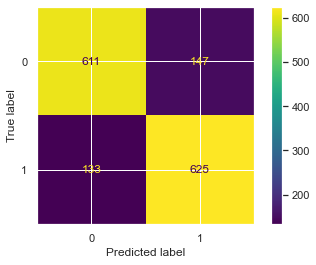

In [37]:
# Confusion metrics for training set
plot_confusion_matrix(full_pipeline_log, X_train_under, y_train_under);

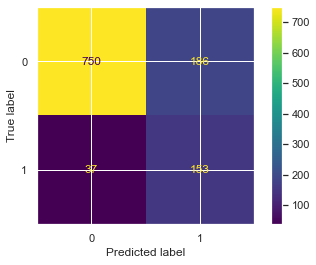

In [38]:
plot_confusion_matrix(full_pipeline_log, X_test, y_test);

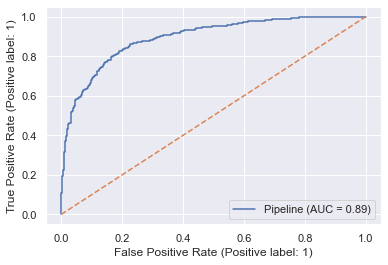

In [39]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

we can see the good result from AUC score that is 0.93

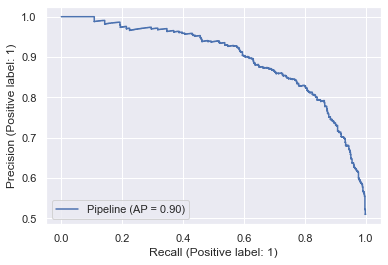

In [40]:
plot_precision_recall_curve(full_pipeline_log, X_train_under, y_train_under);

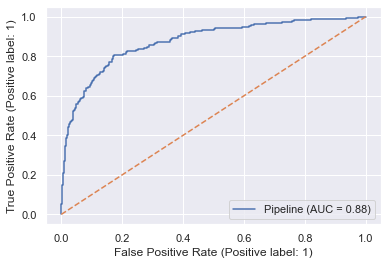

In [41]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

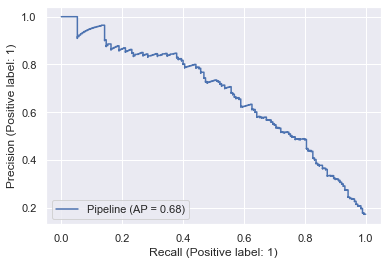

In [42]:
plot_precision_recall_curve(full_pipeline_log, X_test, y_test);

### V. Hyperparameter Tuning Logistic Regression

We try to Tuning our model to get a better result.

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log_reg__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'log_reg__C' : [1,2, 4, 8, 10, 20, 30, 40] 
}

grid_search = GridSearchCV(full_pipeline_log, param_grid, cv=5, n_jobs=-1, scoring='recall')

grid_search.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('ctg_transformer',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_transformer',
                                                                         RobustScaler(),
                                                                         ['CityTier',
        

In [44]:
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train_under, y_train_under)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('ctg_transformer',
                                                  OneHotEncoder(),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_transformer',
                                                  RobustScaler(),
                                                  ['CityTier',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount',
                                         

In [45]:
# score after tuning
log_reg_best.fit(X_train_under,y_train_under)

print('Train set:{}'.format(log_reg_best.score(X_train_under,y_train_under)))
print('Test set:{}'.format(log_reg_best.score(X_test,y_test)));

Train set:0.8139841688654353
Test set:0.8037300177619894


The results before tuning are even better (Train 82%, Test 80%) than the results after tuning (Train 81%, Test 79%), and most likely, will be the same for all results

In [46]:
# clf report for train
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg_best = log_reg_best.predict(X_train_under)
clf_report = classification_report(y_train_under,y_train_log_reg_best)
print(clf_report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       758
           1       0.81      0.82      0.82       758

    accuracy                           0.81      1516
   macro avg       0.81      0.81      0.81      1516
weighted avg       0.81      0.81      0.81      1516



In [47]:
# clf report for test
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg_best = log_reg_best.predict(X_test)
clf_report_log_reg = classification_report(y_test, y_test_log_reg_best)
print(clf_report_log_reg)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.81      0.58       190

    accuracy                           0.80      1126
   macro avg       0.70      0.81      0.73      1126
weighted avg       0.87      0.80      0.82      1126



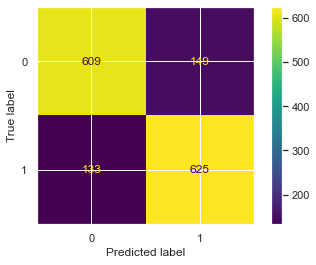

In [48]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_train_under, y_train_under);

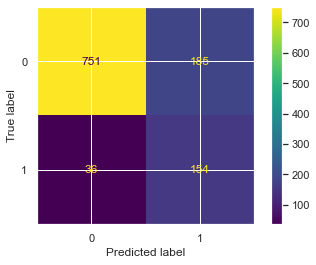

In [49]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_test, y_test);

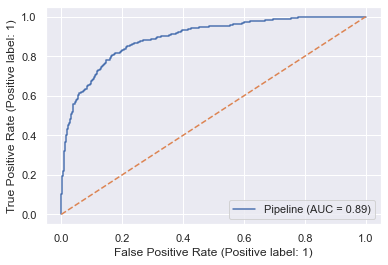

In [50]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(log_reg_best, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

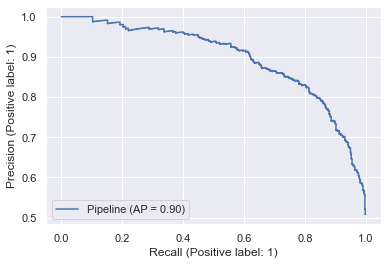

In [51]:
plot_precision_recall_curve(log_reg_best, X_train_under, y_train_under);

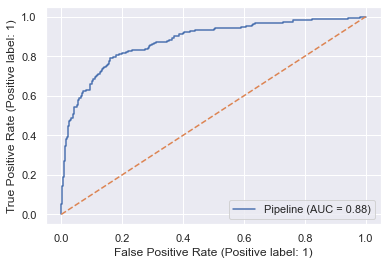

In [52]:
# roc_curve for test

plot_roc_curve(log_reg_best, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

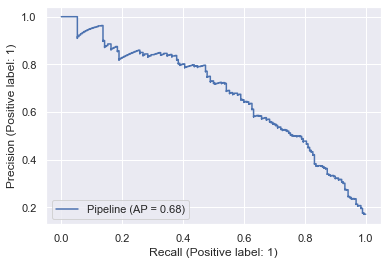

In [53]:
plot_precision_recall_curve(log_reg_best, X_test, y_test);

In [54]:
log_reg_coef = full_pipeline_log.named_steps.log_reg.coef_

feature_name = full_pipeline_log['full_pipeline'].transformers_[0][1].get_feature_names().tolist() + num_cols

df_result_coef = pd.DataFrame({
    'name':feature_name,
    'coef':log_reg_coef.flatten()
})

df_coef = df_result_coef.sort_values('coef')
df_coef

,name,coef
28,Tenure,-1.810268
14,x3_Laptop & Accessory,-1.573364
25,CashbackAmount,-0.749819
31,DaySinceLastOrder,-0.689962
16,x3_Mobile Phone,-0.641010
3,x1_CC,-0.605605
19,x4_Married,-0.468795
10,x2_Female,-0.199841
15,x3_Mobile,-0.177305
9,x1_UPI,-0.164609


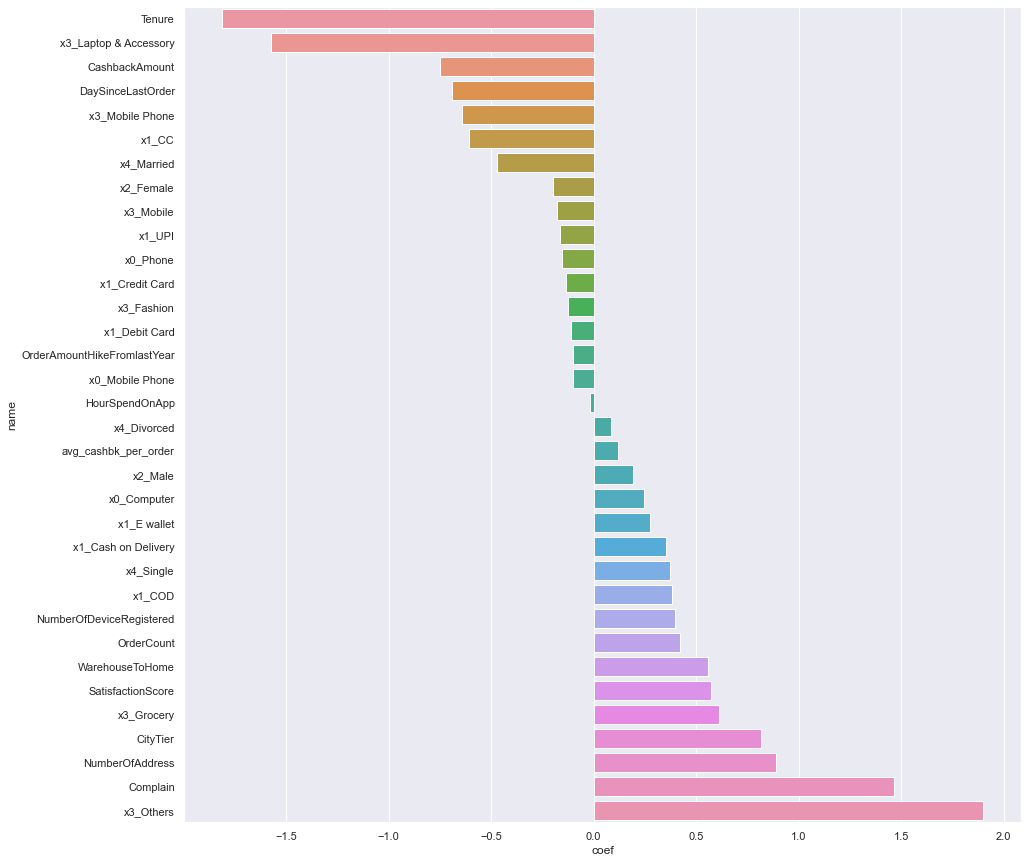

In [55]:
# Generating feature Importance
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef,x='coef',y='name');

According to the model, Tenure is negatively contributes to the churn customer, and conversely, complain has positive influence on the customer churn test score, we can see, customer who send a complain tend to be a churn customer. The other most influental variables are from Prefered Order Categorical, there are Laptop & Accessory and Others

# VI. Conclusion & Recommendation

In this case, to predict which customers will churn, we use the Logistic Regression model, with an accuracy score of 82% for the training set and 80% for the testing set. And in this case, we are very concerned about the recall results, so that the True Positive obtained can be maximized. So that the predicted customer will churn, it can be predicted correctly, and the recall result on our machine learning model is 80%.

Based on feature importance, customers who tend to churn are customers who have complained. Therefore, we suggest to the marketing team to pay more attention to customer service and conduct discount promos to customers who are predicted to churn and customers with a short tenure.

Based on data from www.statista.com, "Average value of daily customer transaction" each customer has a value of Rp. 300,000.00. And if we assume that the cost of the promotion spends the marketing cost of Rp. 300/customer. Based on our calculations, the company can prevent an income loss of Rp. 34.099.500.

Source : https://www.statista.com/statistics/1242651/indonesia-average-daily-e-commerce-transaction-value/